In [199]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [200]:
import numpy as np
import pandas as pd

In [201]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [202]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [203]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [204]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [205]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [206]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [207]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [208]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [209]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)

('2017-08-23',)


In [210]:
# Perform a query to retrieve the data and precipitation scores
last_year = '2016-08-23'
prcp_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last_year).all()
print(last_year)

2016-08-23


In [211]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data,columns=['date','precipitation'])
prcp_df.set_index('date', inplace=True, )
#prcp_df

In [212]:
# Sort the dataframe by date
prcp_df.sort_values(by='date',inplace=True)
#prcp_df

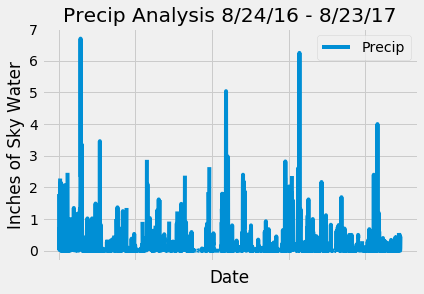

In [213]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches of Sky Water")
plt.title("Precip Analysis 8/24/16 - 8/23/17")
plt.legend(["Precip"])
plt.show()

![precipitation](Images/precipitation.png)

In [214]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [215]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(locations))

There are 9 stations.


In [216]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

busiest = station[0][0]    
print("The busiest station was",busiest,"with",station[0][1],"recorded weather observations.")
print()
print("These are all the Stations with the number of observations they recorded:")
for station, count in station:
    print("Station",station,"had",count, "weather observations")

The busiest station was USC00519281 with 2772 recorded weather observations.

These are all the Stations with the number of observations they recorded:
Station USC00519281 had 2772 weather observations
Station USC00519397 had 2724 weather observations
Station USC00513117 had 2709 weather observations
Station USC00519523 had 2669 weather observations
Station USC00516128 had 2612 weather observations
Station USC00514830 had 2202 weather observations
Station USC00511918 had 1979 weather observations
Station USC00517948 had 1372 weather observations
Station USC00518838 had 511 weather observations


In [217]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [func.distinct(Measurement.station),
       func.min(Measurement.tobs),
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
busiest_summary = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
print(f"Summary for station {busiest_summary[0][0]}:"
      '\n'f"Lowest Temp: {busiest_summary[0][1]}" 
      '\n'f"Highest Temp: {busiest_summary[0][2]}"
      '\n'f"Avg Temp:{busiest_summary[0][3]}")

Summary for station USC00519281:
Lowest Temp: 54.0
Highest Temp: 85.0
Avg Temp:71.66378066378067


In [218]:
# Choose the station with the highest number of temperature observations.
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
#temperature

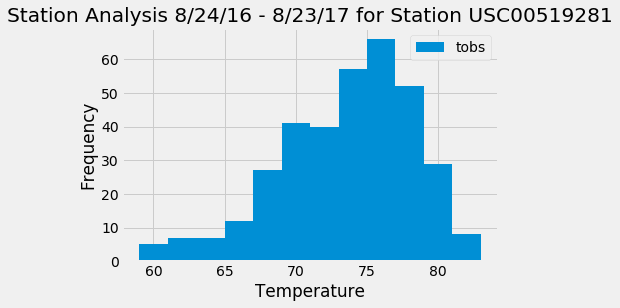

In [219]:
# plot the temperature data in a histogram with 12 bins
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis 8/24/16 - 8/23/17 for Station " + busiest)
plt.legend(["tobs"])
plt.show()